<a href="https://colab.research.google.com/github/skboyina/Tensorflow_Coursera_code/blob/main/stock_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date

In [ ]:
# df = pd.read_csv('https://raw.githubusercontent.com/skboyina/Tensorflow_Coursera_code/main/ACC_LTD_500410.csv')
df = pd.read_csv('sample_data/ACC_LTD_500410.csv')

In [ ]:
# df['Date'] = df.index
print(df['Date'])
print(df.shape)

0        2-Jan-91
1        3-Jan-91
2        7-Jan-91
3        9-Jan-91
4       11-Jan-91
          ...    
7491     8-Oct-21
7492    11-Oct-21
7493    12-Oct-21
7494    13-Oct-21
7495    14-Oct-21
Name: Date, Length: 7496, dtype: object
(7496, 13)


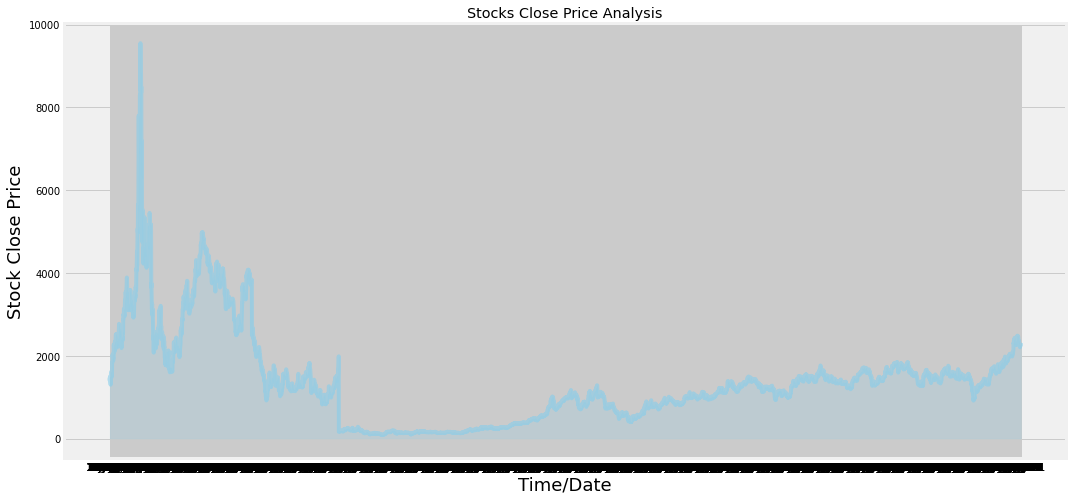

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stocks Close Price Analysis')

plt.fill_between( df['Date'], df['Close Price'], color="skyblue", alpha=0.2)
plt.plot(df['Date'], df['Close Price'], color="skyblue", alpha=0.6)

plt.xlabel('Time/Date',fontsize=18)
plt.ylabel('Stock Close Price',fontsize=18)
plt.show()

In [ ]:

close_col = df.filter(['Close Price'])
close_col_val = close_col.values
#divide the dataset into training data(75%) and testing data(25%)
train_len = math.ceil(len(close_col_val) *.75)

mm_scale = MinMaxScaler(feature_range=(0, 1)) 
mm_scale_data = mm_scale.fit_transform(close_col_val)

In [ ]:
train_data_val = mm_scale_data[0:train_len  , : ]

#Split the data
x_train=[]
y_train = []

for i in range(30, len(train_data_val)):
    x_train.append(train_data_val[i-30:i,0])
    y_train.append(train_data_val[i,0])

np.savetxt("train_x_chk.csv", 
           x_train,
           delimiter =", ", 
           fmt ='% s')

np.savetxt("train_y_chk.csv", 
           y_train,
           delimiter =", ", 
           fmt ='% s')

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

# model.save(symbol+'.model')

Epoch 1/100
112/112 [==============================] - 7s 36ms/step - loss: 0.0015
Epoch 2/100
112/112 [==============================] - 4s 36ms/step - loss: 2.7240e-04
Epoch 3/100
112/112 [==============================] - 4s 35ms/step - loss: 2.6490e-04
Epoch 4/100
112/112 [==============================] - 4s 35ms/step - loss: 2.0887e-04
Epoch 5/100
112/112 [==============================] - 4s 36ms/step - loss: 1.9929e-04
Epoch 6/100
112/112 [==============================] - 4s 35ms/step - loss: 1.8179e-04
Epoch 7/100
112/112 [==============================] - 4s 36ms/step - loss: 1.6042e-04
Epoch 8/100
112/112 [==============================] - 4s 35ms/step - loss: 1.5259e-04
Epoch 9/100
112/112 [==============================] - 4s 35ms/step - loss: 1.6140e-04
Epoch 10/100
112/112 [==============================] - 4s 35ms/step - loss: 1.5099e-04
Epoch 11/100
112/112 [==============================] - 4s 36ms/step - loss: 1.3808e-04
Epoch 12/100
112/112 [=======================

In [ ]:
 print(len(mm_scale_data))
 print(len(train_data_val))

#Test data set
test_data = mm_scale_data[train_len - 30: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  close_col_val[train_len - 30 : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

7496
5622


In [ ]:

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = mm_scale.inverse_transform(predictions)#Undo scaling

#Calculate/Get the value of RMSE
# rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# print(rmse)